
# 🧠 L2 (Ridge) Regularization

In this notebook, we'll learn:
- What L2 regularization is and why it's used
- The mathematical derivation with a simple example
- How to apply L2 regularization in a neural network using TensorFlow
- A practical demo using the MNIST dataset

---



## 📐 What is L2 Regularization?

**L2 regularization** (also called **Ridge Regularization**) adds a penalty proportional to the **square of the weights** to the loss function.

### 🧮 Modified Loss Function

$
L_{\text{new}} = L + \lambda \sum w_{ij}^2
$

- $ L $: original loss (e.g., cross-entropy)
- $ \lambda $: regularization strength (hyperparameter)
- $ w_{ij} $ weights in the model

Unlike L1, L2 does **not promote sparsity**, but **shrinks weights** toward zero, preventing them from growing large.

---



## 🔢 Step-by-Step Math with 2×2 Weight Matrix

Assume:

$
W =
\begin{bmatrix}
0.8 & -0.3 \\
0.0 & 0.5
\end{bmatrix}
$

Let the base loss be $ L = 0.52 $, and $ \lambda = 0.01 $.



### Step 1: Compute L2 Penalty

$
\sum w_{ij}^2 = 0.8^2 + (-0.3)^2 + 0.0^2 + 0.5^2 = 0.64 + 0.09 + 0.0 + 0.25 = 0.98
$

---

### Step 2: Compute Total Loss

$
L_{\text{new}} = 0.52 + 0.01 \times 0.98 = 0.52 + 0.0098 = 0.5298
$

---

### Step 3: Compute Total Gradient

Assume:

$
\nabla L =
\begin{bmatrix}
0.02 & -0.01 \\
0.03 & -0.04
\end{bmatrix}
$

Gradient from L2 penalty:

$
\lambda \cdot 2W =
0.01 \cdot 2 \cdot
\begin{bmatrix}
0.8 & -0.3 \\
0.0 & 0.5
\end{bmatrix}
$
$=$
$
\begin{bmatrix}
0.016 & -0.006 \\
0.0 & 0.01
\end{bmatrix}
$

Total gradient:

$
\nabla L_{\text{new}} =
\begin{bmatrix}
0.02 & -0.01 \\
0.03 & -0.04
\end{bmatrix}
$
$+$
$
\begin{bmatrix}
0.016 & -0.006 \\
0.0 & 0.01
\end{bmatrix}
$
$=$
$
\begin{bmatrix}
0.036 & -0.016 \\
0.03 & -0.03
\end{bmatrix}
$

---

### Step 4: Update Weights (with $ \eta = 0.1 $)

$
W_{\text{new}} =
\begin{bmatrix}
0.8 & -0.3 \\
0.0 & 0.5
\end{bmatrix}
$
$-$
$
0.1 \cdot
\begin{bmatrix}
0.036 & -0.016 \\
0.03 & -0.03
\end{bmatrix}
$
$=$
$
\begin{bmatrix}
0.7964 & -0.2984 \\
-0.003 & 0.503
\end{bmatrix}
$



---
## 🧪 L2 Regularization on MNIST Dataset (TensorFlow Demo)


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random

In [2]:

# Load and preprocess the MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Split validation set
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]


In [3]:

# Take only 1000 training samples
x_small_train = x_train[:300]
y_small_train = y_train[:300]


[0 1 2 3 4 5 6 7 8 9] [34 39 28 34 32 23 29 29 21 31]


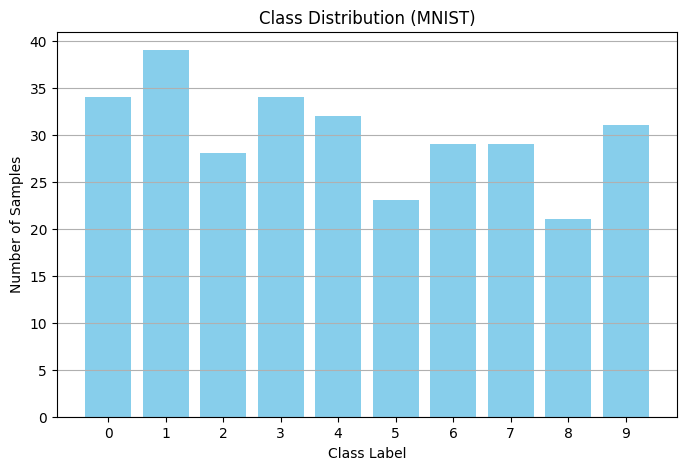

In [4]:
# Plot the bar chart
classes, counts = np.unique(y_small_train, return_counts=True)
print(classes, counts)
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, tick_label=[str(c) for c in classes], color='skyblue')
plt.title("Class Distribution (MNIST)")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()

In [5]:

# Define model with L2 regularization
def overfitting_model_l2(lambda_val=0.002):
    model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(lambda_val)),
    layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create and train the model
model = overfitting_model_l2()


In [6]:

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/50
391/391 - 18s - 46ms/step - accuracy: 0.9162 - loss: 1.4228 - val_accuracy: 0.9287 - val_loss: 0.7059
Epoch 2/50
391/391 - 16s - 41ms/step - accuracy: 0.9532 - loss: 0.5132 - val_accuracy: 0.9617 - val_loss: 0.4050
Epoch 3/50
391/391 - 16s - 40ms/step - accuracy: 0.9587 - loss: 0.3870 - val_accuracy: 0.9645 - val_loss: 0.3450
Epoch 4/50
391/391 - 15s - 40ms/step - accuracy: 0.9631 - loss: 0.3338 - val_accuracy: 0.9542 - val_loss: 0.3376
Epoch 5/50
391/391 - 16s - 41ms/step - accuracy: 0.9650 - loss: 0.3045 - val_accuracy: 0.9682 - val_loss: 0.2858
Epoch 6/50
391/391 - 15s - 39ms/step - accuracy: 0.9688 - loss: 0.2809 - val_accuracy: 0.9661 - val_loss: 0.2848
Epoch 7/50
391/391 - 16s - 41ms/step - accuracy: 0.9698 - loss: 0.2674 - val_accuracy: 0.9696 - val_loss: 0.2580
Epoch 8/50
391/391 - 15s - 39ms/step - accuracy: 0.9712 - loss: 0.2543 - val_accuracy: 0.9693 - val_loss: 0.2518
Epoch 9/50
391/391 - 17s - 42ms/step - accuracy: 0.9721 - loss: 0.2464 - val_accuracy: 0.9700 - 

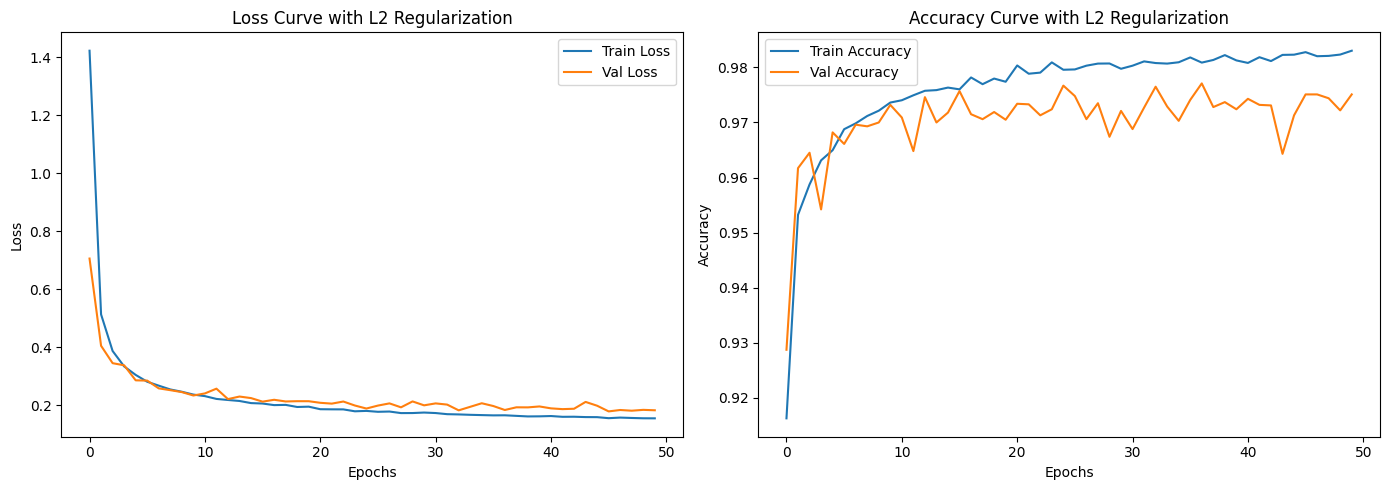

In [7]:

# Plot training and validation performance
def plot_history(history):
    plt.figure(figsize=(14, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve with L2 Regularization')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve with L2 Regularization')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [17]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=1)
# print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 [==============================] - 1s 3ms/step - loss: 0.1901 - accuracy: 0.9719
Accuracy: 0.9719, Loss: 0.1901
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 6 9]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.98      0.97      1032
 


## ✅ Summary

- L2 regularization adds a penalty $ \lambda \sum w^2 $ to the loss.
- It reduces overfitting by shrinking weights, not zeroing them out.
- In the demo, training is smoother and generalization improves.
- You can tune `lambda_val` to see how regularization strength affects performance.

---
